In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2,os
from sklearn.metrics import classification_report
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

import glob
import tensorflow
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split

In [ ]:
# rescale (normalize) the images and generate a set of new images with differnet rotations and zoom levels (augmentatoin) to prevent overfitting
# it can also help to balance the imbalanced data
# by default keras automatically converts all images to RGB mode, so no need to convert images, if they are differnet.
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
# apply the data augmentatoin on the dataset and reduce their size for faster (but of course less accurate) learning
img_width, img_height = 64, 64
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Pneumonia_Detection/chest_xray/chest_xray/train',
                                                 target_size = (img_width, img_height),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from collections import Counter
cases_count = Counter(training_set.classes)
print(cases_count.items())

dict_items([(0, 1341), (1, 3875)])


In [ ]:
total = cases_count[0] + cases_count[1]
weight_for_0 = (1 / cases_count[0]) * (total / 2.0)
weight_for_1 = (1 / cases_count[1]) * (total / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}
print(class_weight)

{0: 1.9448173005219984, 1: 0.6730322580645162}


In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Pneumonia_Detection/chest_xray/chest_xray/val',
                                            target_size = (img_width, img_height),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 16 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Pneumonia_Detection/chest_xray/chest_xray/test',
                                            target_size = (img_width, img_height),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            shuffle=False)

Found 624 images belonging to 2 classes.


In [ ]:
cnn = tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[img_width, img_height, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model_fit = cnn.fit(x = training_set, validation_data = val_set, epochs = 50, class_weight=class_weight)

Epoch 1/50
163/163 [==============================] - 1020s 6s/step - loss: 0.4256 - accuracy: 0.7786 - val_loss: 0.3562 - val_accuracy: 0.7500
Epoch 2/50
163/163 [==============================] - 71s 435ms/step - loss: 0.2624 - accuracy: 0.8875 - val_loss: 0.3392 - val_accuracy: 0.7500
Epoch 3/50
163/163 [==============================] - 72s 441ms/step - loss: 0.2034 - accuracy: 0.9174 - val_loss: 0.3461 - val_accuracy: 0.8125
Epoch 4/50
163/163 [==============================] - 71s 436ms/step - loss: 0.1838 - accuracy: 0.9256 - val_loss: 0.2774 - val_accuracy: 0.9375
Epoch 5/50
163/163 [==============================] - 71s 434ms/step - loss: 0.1998 - accuracy: 0.9220 - val_loss: 0.4124 - val_accuracy: 0.8125
Epoch 6/50
163/163 [==============================] - 70s 431ms/step - loss: 0.1984 - accuracy: 0.9191 - val_loss: 0.5463 - val_accuracy: 0.6250
Epoch 7/50
163/163 [==============================] - 70s 432ms/step - loss: 0.1715 - accuracy: 0.9333 - val_loss: 0.3174 - val_acc

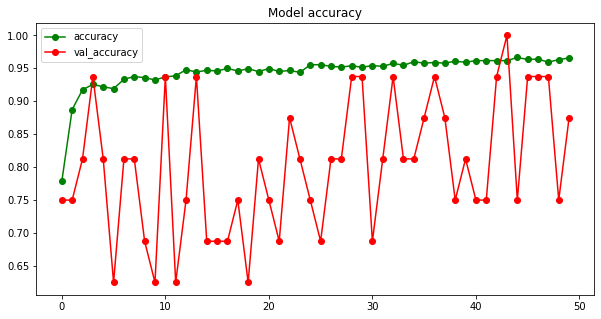

In [ ]:
plt.figure(figsize = (10, 5))
plt.title("Model accuracy")
plt.plot(model_fit.history["accuracy"], "go-")
plt.plot(model_fit.history["val_accuracy"], "ro-")
plt.legend(["accuracy", "val_accuracy"])
plt.show()

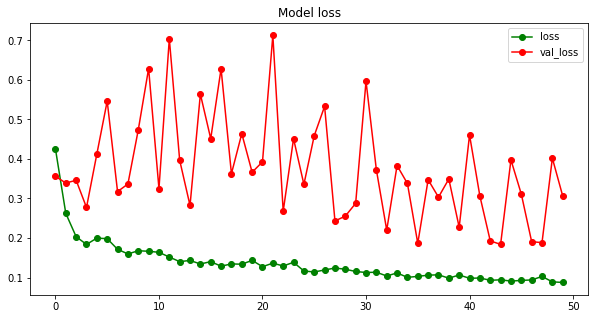

In [ ]:
plt.figure(figsize = (10, 5))
plt.title("Model loss")
plt.plot(model_fit.history["loss"], "go-")
plt.plot(model_fit.history["val_loss"], "ro-")
plt.legend(["loss", "val_loss"])
plt.show()

In [ ]:
y_test = val_set.classes
y_pred = cnn.predict(val_set)
y_pred_probs = y_pred.copy()
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

1/1 [==============================] - 0s 206ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred,target_names = ['Normal','Pnuemonia']))

              precision    recall  f1-score   support

      Normal       0.50      0.62      0.56         8
   Pnuemonia       0.50      0.38      0.43         8

    accuracy                           0.50        16
   macro avg       0.50      0.50      0.49        16
weighted avg       0.50      0.50      0.49        16



In [ ]:
cnn.save("Pneumonialayer50epochs.h5")

In [ ]:
cnn = tf.keras.Model(cnn)
cnn.save_weights("/content")

In [ ]:
model_loaded = tensorflow.keras.models.load_model("/content/Pneumonialayer50epochs.h5")
model_loaded.summary()    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [ ]:
model_evaluation = cnn.evaluate(test_set)
print(f"Model Accuracy: {model_evaluation[1]*100: 0.2f}%")

20/20 [==============================] - 6s 281ms/step - loss: 0.2017 - accuracy: 0.9295
Model Accuracy:  92.95%


In [ ]:
preds = np.round(cnn.predict(test_set),0)
gt_class = test_set.classes
gt_labels = list(test_set.class_indices.keys())

20/20 [==============================] - 7s 334ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
cm = confusion_matrix(gt_class, preds)
print(cm)
print('The cnn model has an accuracy score of {:.2f} and recall score of {:.2f} for {:s}'.format((accuracy_score(gt_class, preds) *100),(recall_score(gt_class, preds) *100),gt_labels[1]))

[[215  19]
 [ 25 365]]
The cnn model has an accuracy score of 92.95 and recall score of 93.59 for PNEUMONIA


In [ ]:
report = classification_report(gt_class, preds, target_names=gt_labels)
print(report)

              precision    recall  f1-score   support

      NORMAL       0.90      0.92      0.91       234
   PNEUMONIA       0.95      0.94      0.94       390

    accuracy                           0.93       624
   macro avg       0.92      0.93      0.93       624
weighted avg       0.93      0.93      0.93       624



In [ ]:
test_loss, test_accuracy = cnn.evaluate(test_set, steps = 50)
print("The testing accuracy is: ", test_accuracy * 100, "%")
print("The testing loss is: ", test_loss * 100, "%")

20/50 [===========>..................] - ETA: 8s - loss: 0.2017 - accuracy: 0.9295

50/50 [==============================] - 6s 109ms/step - loss: 0.2017 - accuracy: 0.9295
The testing accuracy is:  92.94871687889099 %
The testing loss is:  20.17042636871338 %


In [ ]:
new_image_path = "/content/drive/MyDrive/Colab Notebooks/Pneumonia_Detection/chest_xray/test/NORMAL/IM-0001-0001.jpeg"
test_image = image.load_img(new_image_path, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image = np.reshape(test_image, (1, 64, 64, 3))
test_image = test_image / 255


result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 0:
    prediction = "N O R M A L"
else:
    prediction = "P N E U M O N I A"

print(prediction)

1/1 [==============================] - 0s 21ms/step
P N E U M O N I A


1/1 [==============================] - 0s 112ms/step
This image is 83.797 percent P N E U M O N I A


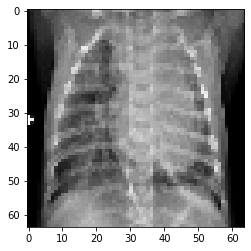

In [ ]:
def image_prediction(new_image_path):
    test_image = image.load_img(new_image_path, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    test_image = test_image / 255.0
    model_loaded = tensorflow.keras.models.load_model("/content/Pneumonialayer50epochs.h5")
    prediction = model_loaded.predict(test_image)
    test_image_for_plotting = image.load_img(new_image_path, target_size = (64, 64))
    plt.imshow(test_image_for_plotting)
    if(prediction[0] > 0.5):
        statistic = prediction[0] * 100 
        print("This image is %.3f percent %s"% (statistic, "P N E U M O N I A"))
    else:
        statistic = (1.0 - prediction[0]) * 100
        print("This image is %.3f percent %s" % (statistic, "N O R M A L"))
     
 
# call and use the function
image_prediction("/content/drive/MyDrive/Colab Notebooks/Pneumonia_Detection/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg")

In [ ]:
test_dir = "/content/drive/MyDrive/Colab Notebooks/Pneumonia_Detection/chest_xray/test"
test_data, test_labels = [], []

In [ ]:
for i in ["/NORMAL/", "/PNEUMONIA/"]:
    for image in (os.listdir(test_dir + i)):
        image = plt.imread(test_dir + i + image)
        image = cv2.resize(image, (64, 64))
        image = np.dstack([image, image, image])
        image = image.astype("float32") / 255
        if i == "/NORMAL/":
            label = 0
        elif i == "/PNEUMONIA/":
            label = 1
        test_data.append(image)
        test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)

C o n f u s i o n   m a t r i x


20/20 [==============================] - 0s 4ms/step


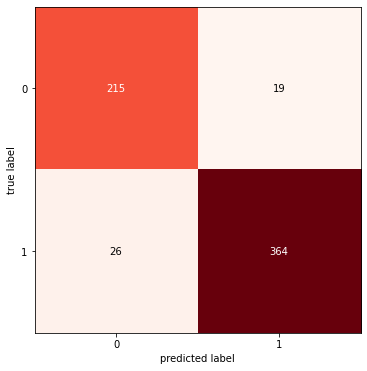

In [ ]:
print("C o n f u s i o n   m a t r i x\n\n")
import matplotlib
import matplotlib.pyplot as plt

predictions = model_loaded.predict(test_data)
conf_m = confusion_matrix(test_labels, np.round(predictions))
acc = accuracy_score(test_labels, np.round(predictions)) * 100
tn, fp, fn, tp = conf_m.ravel()

fig, ax = plot_confusion_matrix(conf_mat = conf_m, figsize = (6, 6), cmap = matplotlib.pyplot.cm.Reds)
plt.show()

In [ ]:
precision = tp / (tp + fp) * 100
recall = tp / (tp + fn) * 100
print("Accuracy: {}%".format(acc))
print("Precision: {}%".format(precision))
print("Recall: {}%".format(recall))
print("F1-score: {}".format(2 * precision * recall / (precision + recall)))

Accuracy: 92.78846153846155%
Precision: 95.03916449086162%
Recall: 93.33333333333333%
F1-score: 94.17852522639068
